# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Прочтите файл [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Создайте фрейм данных `df` со столбцами: `uid`, `labname`, `numTrials`, `hour`, `dayofweek`, где `hour` извлекается из `timestamp`, а также `dayofweek` (`0` — понедельник, `6` — воскресенье). Мы попытаемся предсказать день недели, имея данные о том, какой пользователь совершил коммит для какой лабораторной в какое время и в какой попытке. 
 3. Используя `OneHotEncoder()` для преобразования категориальных признаков, удалите из фрейма данных исходные столбцы.
4. Используйте `StandardScaler()` и масштабируйте непрерывные признаки.
5. Сохраните фрейм данных как `dayofweek.csv`.
6. Прежде чем пробовать разные алгоритмы, определите точность наивных алгоритмов — тех, которые предсказывают всё как наиболее популярный класс.

In [2]:
df = pd.read_csv('../data/checker_submits.csv')
# df

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek']= df['timestamp'].dt.dayofweek
df = df[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']]
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


## OneHotEncoder() для преобразования категориальных признаков

 Категориальные признаки — это переменные, которые принимают ограниченное количество значений (категорий) и обычно не имеют числового смысла. Модели машинного обучения работают только с числами, поэтому категориальные признаки нужно перевести в числовой формат.

 OneHotEncoder — это инструмент для преобразования категориальных признаков (строковых или целочисленных меток) в бинарные числовые столбцы (0 или 1).

In [4]:
categorical_features = df[['uid', 'labname']] #такие признаки относятся к номинальным
encoder = OneHotEncoder()
encoder_features = encoder.fit_transform(categorical_features).toarray()
encoder_features_df = pd.DataFrame(encoder_features, columns=encoder.get_feature_names_out(['uid', 'labname']),index=df.index)
encoded_df = pd.concat([df, encoder_features_df], axis=1)
encoded_df = encoded_df.drop(['uid', 'labname'], axis=1)
encoded_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## StandardScaler() и масштабирование непрерывных признаков

Непрерывные признаки (continuous features) — это числовые переменные, которые могут принимать любое значение в некотором диапазоне. В отличие от категориальных данных, они не имеют фиксированных категорий и могут быть дробными

In [5]:
continuous_features = encoded_df[['numTrials', 'hour']]

# Масштабируем
scaler = StandardScaler()
scaled_features = scaler.fit_transform(continuous_features)

encoded_df[['numTrials', 'hour']] = scaled_features

scaled_df = encoded_df
scaled_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
scaled_df.to_csv('../data/dayofweek.csv', index=False)

## Определите точность наивных алгоритмов(Baseline Models) — тех, которые предсказывают всё как наиболее популярный класс

Перед построением сложных моделей важно определить базовый уровень точности (baseline). Это поможет понять, насколько хорошо работает текущая модель по сравнению с тривиальными предсказаниями.
Предскажем самый популярный день(dayofweek)

In [7]:
popular_day = df['dayofweek'].mode()[0]
print(f"Самый популярный день недели: {popular_day}")

Самый популярный день недели: 3


In [8]:
# наивные предсказания
baseline_predictions = [popular_day] * len(df)  # предсказываем везде самый частый день
baseline_accuracy = accuracy_score(df['dayofweek'], baseline_predictions)

print(f"Baseline точность: {baseline_accuracy}")

Baseline точность: 0.23487544483985764


## 2. Algorithms

### a. Logreg

1. Обучите логистическую регрессию, для базовой модели используйте `random_state=21`, `fit_intercept=False`. 
2. Рассчитайте точность.
3. Напишите функцию, которая строит график (`barh`) с коэффициентами любых обученных моделей, названиями признаков и количеством наиболее важных признаков `top-n`.
4. Постройте график (`barh`) для базовой модели с 10 наиболее важными признаками (по абсолютному значению) для обученной модели.
5. Помните, что это многоклассовая классификация, и `coef_` возвращает матрицу. Чтобы рассчитать важность признака, необходимо суммировать все индивидуальные значения важности признаков для всех целевых значений.

In [9]:
# Подготовка данных
x = scaled_df.drop('dayofweek', axis=1)
y = scaled_df['dayofweek']

In [10]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(x, y)

y_pred = model.predict(x)
accuracy_logreg = accuracy_score(y, y_pred)

print(f"Точность логистической регрессии: {accuracy_logreg}")

Точность логистической регрессии: 0.6405693950177936


Точность логистической регрессии значительно превышает baseline (23.49%), что означает, что модель действительно выявляет закономерности в данных, а не просто угадывает самый частый класс.

## Функция, которая строит график (`barh`) с коэффициентами любых обученных моделей, названиями признаков и количеством наиболее важных признаков `top-n`

In [11]:
def visualize_plot(model_title, coefficients, feature_names, top_features=10):
    
    feature_names = np.array(feature_names)
    coefs = np.array(coefficients)
    
    
    if coefs.ndim > 1:
        importances = np.max(np.abs(coefs), axis=0)
        x_label = "Максимальный абсолютный коэффициент"
    else:
        importances = coefs
        x_label = "Значение важности признака"
    
    sorted_indices = np.argsort(importances)[-top_features:]
    sorted_values = importances[sorted_indices]
    sorted_names = feature_names[sorted_indices]
    
    plt.figure(figsize=(10, 0.5 * top_features))
    
    if any(x in model_title.lower() for x in ['tree', 'forest']):
        bar_color = "#dd64bb"
    elif 'sv' in model_title.lower():
        bar_color = "#2340e5"
    else:
        bar_color = "#9CEB4E"
    
    bars = plt.barh(
        range(top_features),
        sorted_values,
        color=bar_color,
        alpha=0.7,
        edgecolor='black'
    )
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(
            width + 0.01 * max(sorted_values),
            bar.get_y() + bar.get_height()/2,
            f'{width:.3f}',
            va='center',
            fontsize=9
        )
    
    plt.yticks(range(top_features), sorted_names)
    plt.title(f'Топ-{top_features} важных признаков: {model_title}', pad=15)
    plt.xlabel(x_label)
    plt.ylabel('Признаки')
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='x', linestyle=':', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

## График (`barh`) для базовой модели с 10 наиболее важными признаками (по абсолютному значению) для обученной модели.

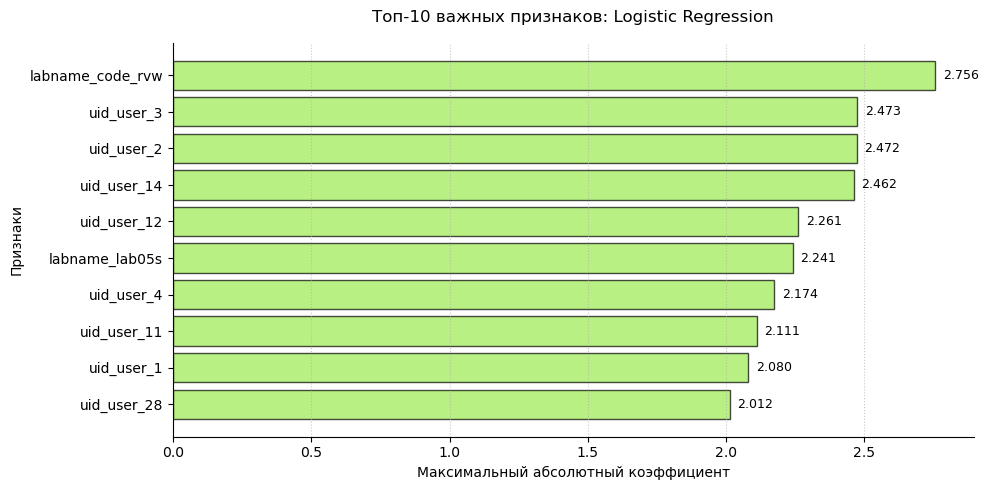

In [12]:
visualize_plot(
    model_title="Logistic Regression", 
    coefficients=model.coef_, 
    feature_names=x.columns.tolist(), 
    top_features=10
)

## Рассчитываем общую важность признаков (сумма абсолютных значений по всем классам)

Общая важность признака в многоклассовой классификации — это агрегированная мера того, насколько сильно признак влияет на предсказание всех классов (в нашем случае — дней недели).

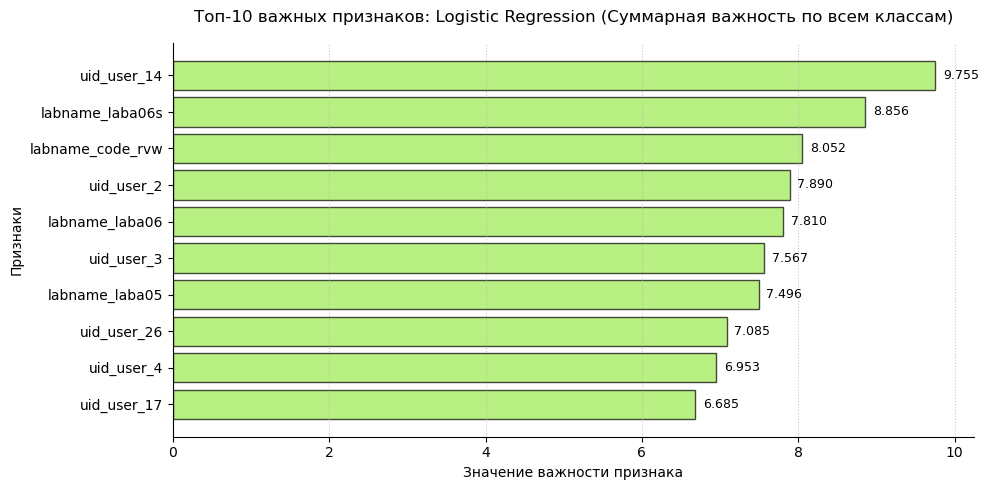

In [13]:
total_feature_importance = np.sum(np.abs(model.coef_), axis=0)

visualize_plot(
    model_title="Logistic Regression (Суммарная важность по всем классам)", 
    coefficients=total_feature_importance,
    feature_names=x.columns.tolist(), 
    top_features=10
)

### b. SVC

1. Обучите модель `SVC`, для базовой модели используйте параметры `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Попробуйте разные ядра, рассчитайте точность.
3. Постройте график (`barh`) для базовой модели с 10 наиболее важными признаками (абсолютное значение) для обученной модели с линейным ядром *

*По умолчанию SVC использует стратегию классификации «один против одного», поэтому в `coef_` возвращается матрица. Чтобы рассчитать важность признака, нужно использовать [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) поверх SVC и суммировать все индивидуальные значения важности признаков для всех целевых значений.

In [14]:
svc_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
svc_model.fit(x, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

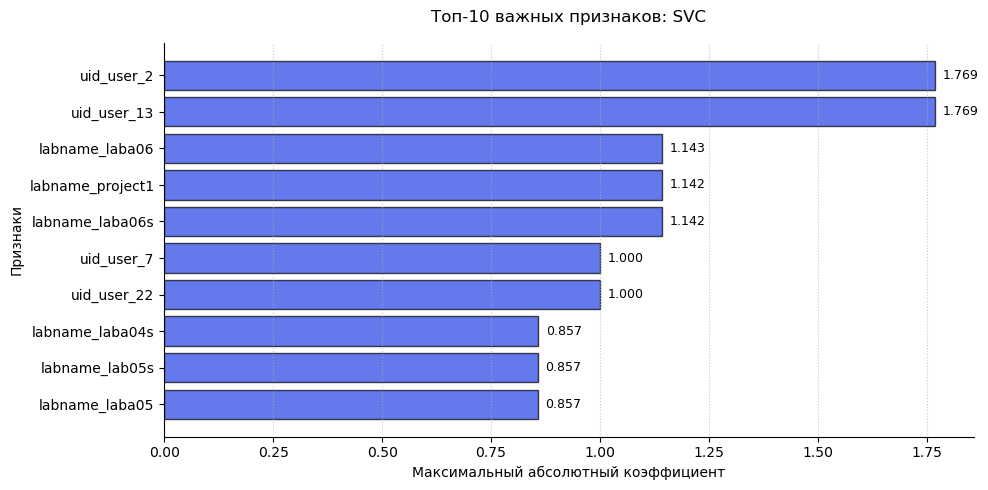

In [15]:
visualize_plot(
    model_title="SVC", 
    coefficients=svc_model.estimators_[1].coef_, 
    feature_names=x.columns.tolist(), 
    top_features=10
)

## Попробуйте разные ядра, рассчитайте точность

In [16]:
svc_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
svc_model.fit(x, y)
y_pred = svc_model.predict(x)
accuracy_svc = accuracy_score(y, y_pred)

print(f"Точность SVC (linear): {accuracy_svc}")

Точность SVC (linear): 0.6126927639383155


In [17]:
svc_model = OneVsRestClassifier(SVC(kernel='poly', probability=True, random_state=21))
svc_model.fit(x, y)

y_pred = svc_model.predict(x)
accuracy_svc = accuracy_score(y, y_pred)

print(f"Точность SVC (poly): {accuracy_svc}")

Точность SVC (poly): 0.8653618030842231


In [18]:
svc_model = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=21))
svc_model.fit(x, y)

y_pred = svc_model.predict(x)
accuracy_svc = accuracy_score(y, y_pred)

print(f"Точность SVC (rbf): {accuracy_svc}")

Точность SVC (rbf): 0.8641755634638197


In [19]:
svc_model = OneVsRestClassifier(SVC(kernel='sigmoid', probability=True, random_state=21))
svc_model.fit(x, y)

y_pred = svc_model.predict(x)
accuracy_svc = accuracy_score(y, y_pred)

print(f"Точность SVC (sigmoid): {accuracy_svc}")

Точность SVC (sigmoid): 0.3499406880189798


### c. Decision tree

1. Обучите `DecisionTreeClassifier`, используя для базовой модели параметры `max_depth=4`, `random_state=21`. 
2. Попробуйте разные значения `max_depth`, рассчитайте точность.
3. Постройте график (`barh`) для базовой модели с 10 наиболее важными признаками (абсолютное значение) для обученной модели с помощью написанной функции.

In [20]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=21)
dt_model.fit(x, y)

DecisionTreeClassifier(max_depth=4, random_state=21)

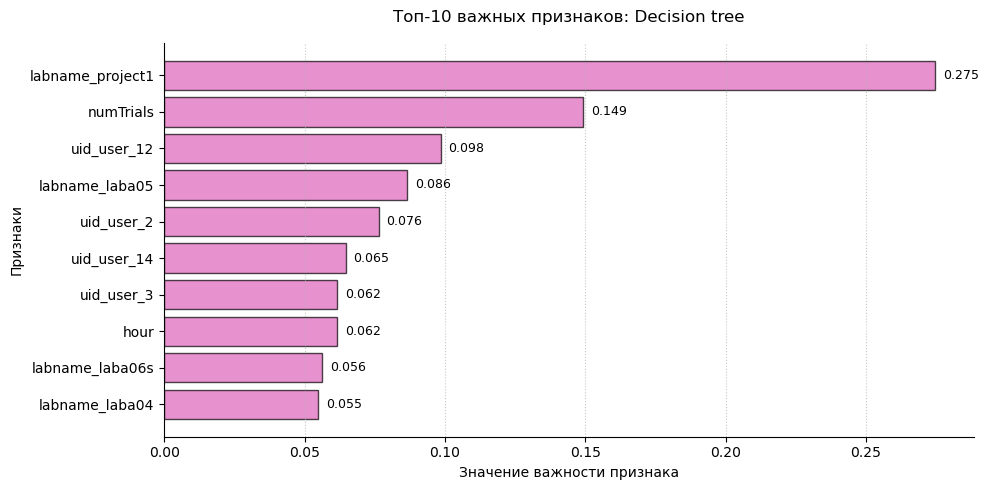

In [21]:
visualize_plot(
    model_title="Decision tree", 
    coefficients=dt_model.feature_importances_, 
    feature_names=x.columns.tolist(), 
    top_features=10
)

In [22]:
for depth in range(1, 15):
    temp_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_tree.fit(x, y)
    accuracy = accuracy_score(y, temp_tree.predict(x))
    print(f'max_depth = {depth}: Точность = {accuracy}')

max_depth = 1: Точность = 0.35765124555160144
max_depth = 2: Точность = 0.4389086595492289
max_depth = 3: Точность = 0.48991696322657174
max_depth = 4: Точность = 0.5516014234875445
max_depth = 5: Точность = 0.6109134045077106
max_depth = 6: Точность = 0.6637010676156584
max_depth = 7: Точность = 0.7064056939501779
max_depth = 8: Точность = 0.7502965599051008
max_depth = 9: Точность = 0.7846975088967971
max_depth = 10: Точность = 0.8196915776986952
max_depth = 11: Точность = 0.8499406880189798
max_depth = 12: Точность = 0.8831553973902728
max_depth = 13: Точность = 0.9104389086595492
max_depth = 14: Точность = 0.9317912218268091


### d. Random forest

В реальной жизни лес — это совокупность деревьев. То же самое и с машинным обучением. Случайный лес — это совокупность отдельных деревьев решений (подробнее см. в документации).

1. Обучите классификатор RandomForestClassifier, используя в качестве базовых параметров модели `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Попробуйте разные значения `max_depth` и `n_estimators`, рассчитайте точность.
3. Постройте график (`barh`) для базовой модели с 10 наиболее важными признаками (абсолютное значение) для обученной модели с помощью написанной функции.

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf_model.fit(x, y)

RandomForestClassifier(max_depth=25, random_state=21)

In [24]:
y_pred = rf_model.predict(x)
accuracy_rf = accuracy_score(y, y_pred)
print(f"Точность RandomForest: {accuracy_rf}")

Точность RandomForest: 1.0


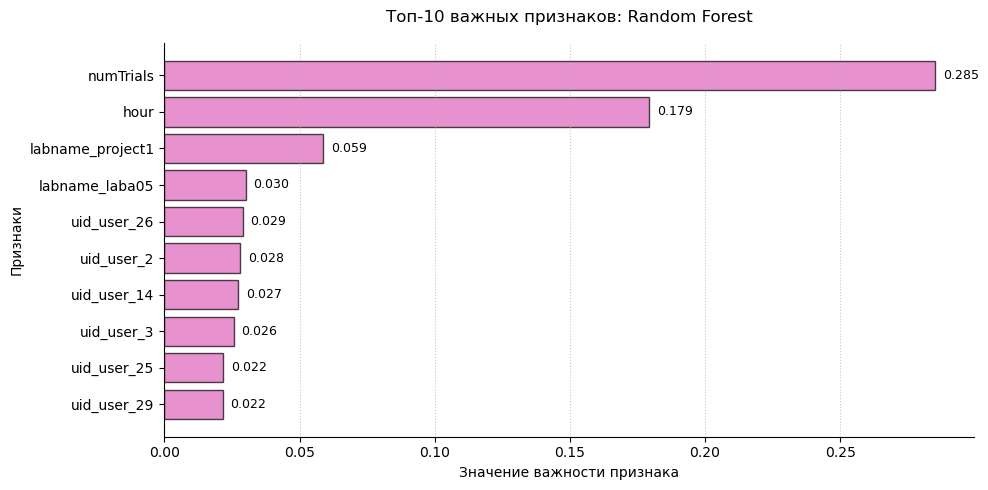

In [25]:
visualize_plot(
    model_title="Random Forest", 
    coefficients=rf_model.feature_importances_,
    feature_names=x.columns.tolist(),
    top_features=10
)

## Попробуйте разные значения `max_depth` и `n_estimators`, рассчитайте точность

In [26]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=21)
rf_model.fit(x, y)
y_pred = rf_model.predict(x)
accuracy_rf = accuracy_score(y, y_pred)
print(f"Точность RandomForest: {accuracy_rf}")

Точность RandomForest: 0.5848161328588375


In [27]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=21)
rf_model.fit(x, y)
y_pred = rf_model.predict(x)
accuracy_rf = accuracy_score(y, y_pred)
print(f"Точность RandomForest: {accuracy_rf}")

Точность RandomForest: 1.0


In [28]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=21)
rf_model.fit(x, y)
y_pred = rf_model.predict(x)
accuracy_rf = accuracy_score(y, y_pred)
print(f"Точность RandomForest: {accuracy_rf}")

Точность RandomForest: 0.9780545670225386
